In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Shape Trainingsdaten: {}".format(train_images.shape))
print("Dimension Bild Nr. 5: {}".format(train_images[5].shape))
print("Label zu Bild Nr. 5 {}".format(train_labels[5]))

Shape Trainingsdaten: (60000, 28, 28)
Dimension Bild Nr. 5: (28, 28)
Label zu Bild Nr. 5 2


In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')
train_images /= 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')
test_images /= 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

NrTrainimages = train_images.shape[0]
NrTestimages = test_images.shape[0]

In [4]:
print("Trainingsdatensatz:{}".format(train_images.shape))
print("Testdatensatz:{}".format(test_images.shape))

print("Wir haben {} Trainingsbilder und {} Testbilder.".format(NrTrainimages, NrTestimages))

Trainingsdatensatz:(60000, 28, 28, 1)
Testdatensatz:(10000, 28, 28, 1)
Wir haben 60000 Trainingsbilder und 10000 Testbilder.


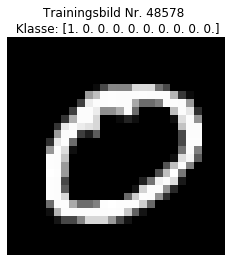

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

randindex = random.randint(0,60000)
plttitle = "Trainingsbild Nr. {} \n Klasse: {}".format(randindex,train_labels[randindex])
plt.imshow(train_images[randindex].reshape(28,28), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()

In [6]:
import os
import numpy as np

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [7]:
# Die Netzwerkarchitektur
model = Sequential()

# Das Format der Eingabedaten wird an das erste Layer übergeben
mnist_inputshape = train_images.shape[1:4]

# Kodierungsblock
model.add(Conv2D(32, kernel_size=(3,3), 
      activation = 'relu',
      input_shape=mnist_inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))
# Conv_Block 2
model.add(Conv2D(64, kernel_size=(3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Prädiktionssblock
model.add(Flatten())
model.add(Dense(128, activation='relu', name='features'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
features (Dense)             (None, 128)               2

In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [9]:
# TensorBoard - Vorbereitung
LOGDIR = "D:\\Python\\KNN\\Buch\\jupyter\\Kapitel\\Kapitel_8\\Graphs" # hier das eigene Verzeichnis angeben

my_tensorboard = TensorBoard(log_dir = LOGDIR,
      histogram_freq=0,
      write_graph=True,
      write_images=True)

# Hyperparameter
my_batch_size = 128
my_num_classes = 10
my_epochs = 12
history = model.fit(train_images, train_labels,
      batch_size=my_batch_size,
      callbacks=[my_tensorboard],
      epochs=my_epochs,
      use_multiprocessing=False,
      verbose=1,
      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 19s 313us/sample - loss: 0.3976 - accuracy: 0.8717 - val_loss: 0.0665 - val_accuracy: 0.9789
Epoch 2/12
60000/60000 [==============================] - 17s 291us/sample - loss: 0.1249 - accuracy: 0.9626 - val_loss: 0.0454 - val_accuracy: 0.9858
Epoch 3/12
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0948 - accuracy: 0.9719 - val_loss: 0.0349 - val_accuracy: 0.9885
Epoch 4/12
60000/60000 [==============================] - 17s 289us/sample - loss: 0.0824 - accuracy: 0.9751 - val_loss: 0.0302 - val_accuracy: 0.9896
Epoch 5/12
60000/60000 [==============================] - 18s 301us/sample - loss: 0.0729 - accuracy: 0.9783 - val_loss: 0.0283 - val_accuracy: 0.9904
Epoch 6/12
60000/60000 [==============================] - 18s 296us/sample - loss: 0.0667 - accuracy: 0.9795 - val_loss: 0.0261 - val_accuracy: 0.9917
Epoch 7/12
60000/60000 [====================

In [10]:
score = model.evaluate(test_images, test_labels)
print('Test Verlust:', score[0])
print('Test Genauigkeit:', score[1])

Test Verlust: 0.0242489751404697
Test Genauigkeit: 0.9916


In [11]:
from tensorflow.keras import models

In [12]:
modellverzeichnis = "D:/Python/KNN/Buch/jupyter/Kapitel/Kapitel_8/Graphs/models"

# Speichern des Modells im TensorFlow-SavedModel Format
model.save(modellverzeichnis, save_format = 'tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: D:/Python/KNN/Buch/jupyter/Kapitel/Kapitel_8/Graphs/models\assets


In [13]:
from tensorflow.keras.models import load_model
modellverzeichniss = "D:/Python/KNN/Buch/jupyter/Kapitel/Kapitel_8/Graphs/models"

# Laden des SavedModel-Modells (pb)
# pb ist die typische Dateierweiterung für dieses Format
# allerdings werden auch die Verzeichnisse assets und variables angelegt
new_model_pb = load_model(modellverzeichnis)

prediction_pb = new_model_pb.predict(test_images)

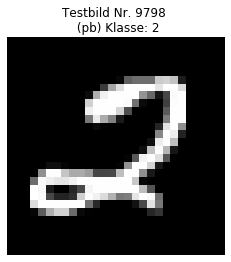

In [48]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

randindex = random.randint(0,10000)
# Die Funktion argmax() liefert uns den index des höchsten Werts des Ergebnisvektors
pb_class = prediction_pb[randindex].argmax()
plttitle = "Testbild Nr. {} \n (pb) Klasse: {}".format(randindex, pb_class)
plt.imshow(test_images[randindex].reshape(28,28), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()